<a href="https://colab.research.google.com/github/lalitha-sahitya/House-Price-Prediction/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install opendatasets

In [192]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
od.download('https://www.kaggle.com/datasets/yasserh/housing-prices-dataset')

Skipping, found downloaded files in "./housing-prices-dataset" (use force=True to force download)


In [194]:
os.listdir('housing-prices-dataset')

['Housing.csv']

In [195]:
data=pd.read_csv('/content/housing-prices-dataset/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


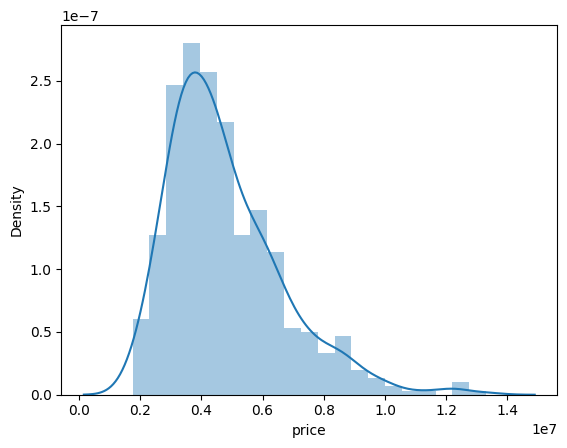

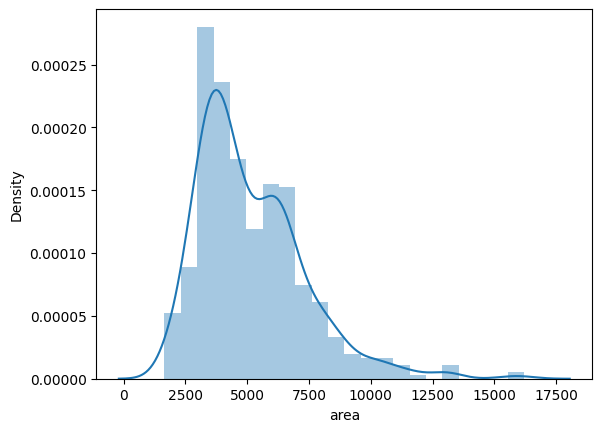

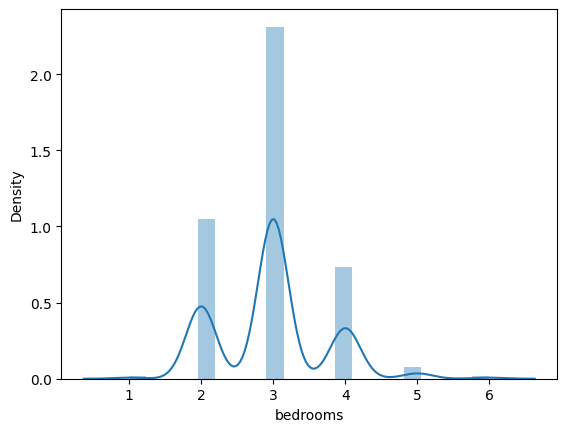

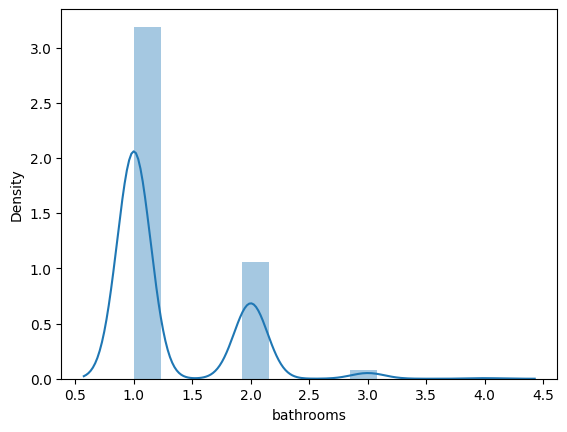

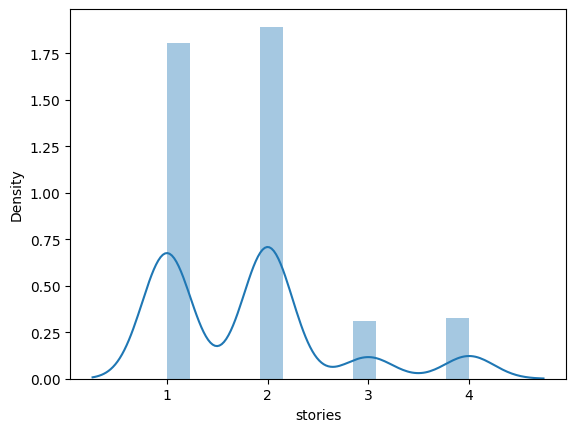

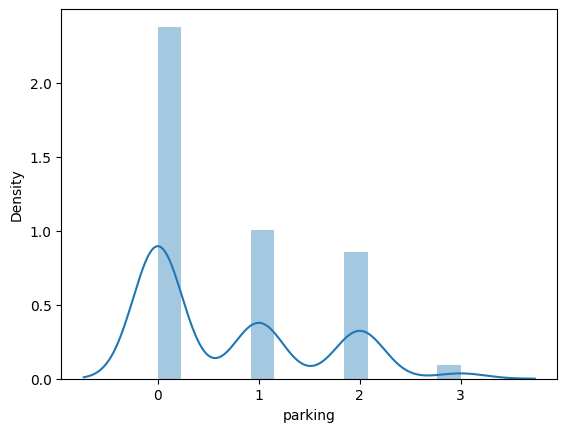

In [197]:
for i in data.select_dtypes(include='number').columns:
  sns.distplot(data[i])
  plt.show()

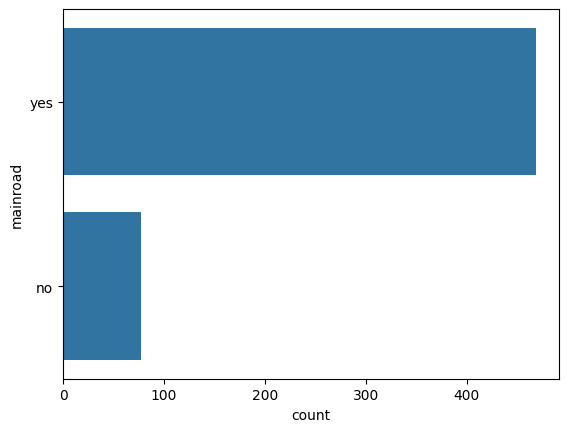

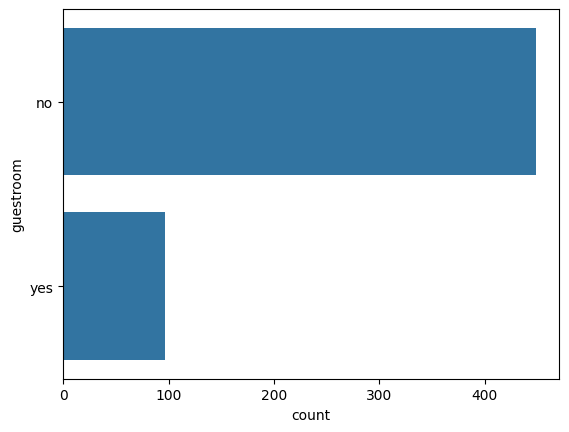

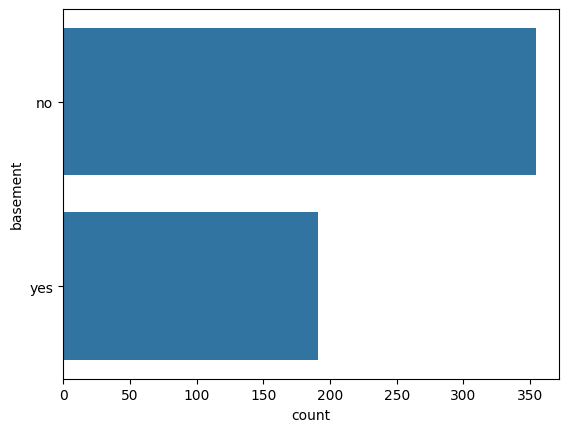

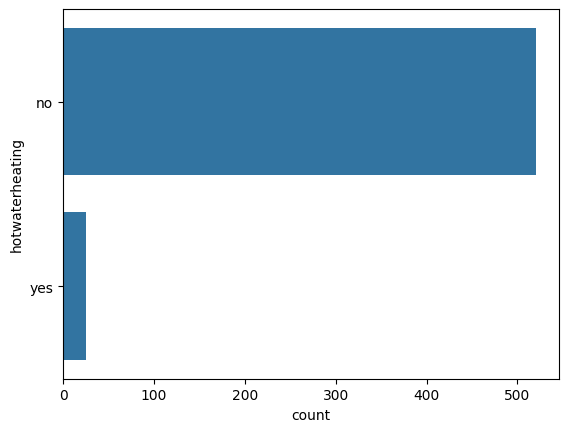

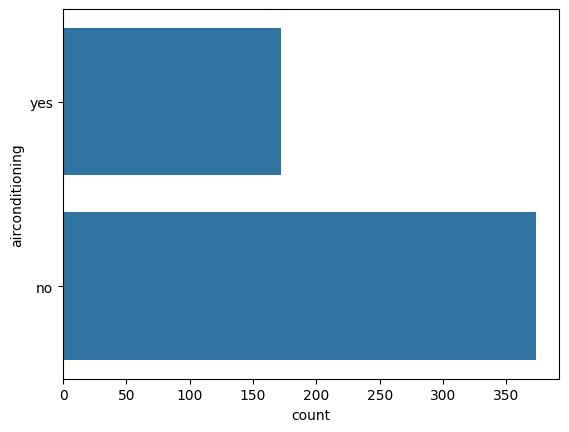

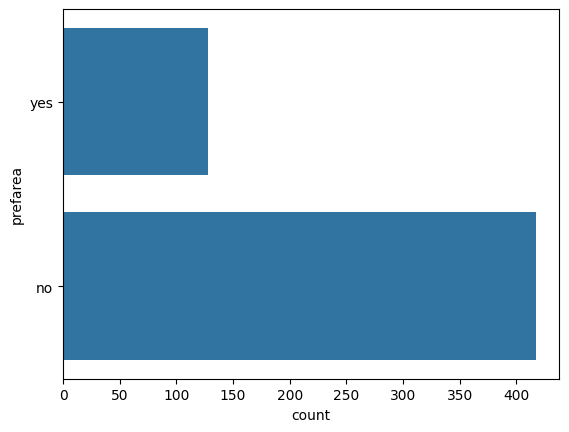

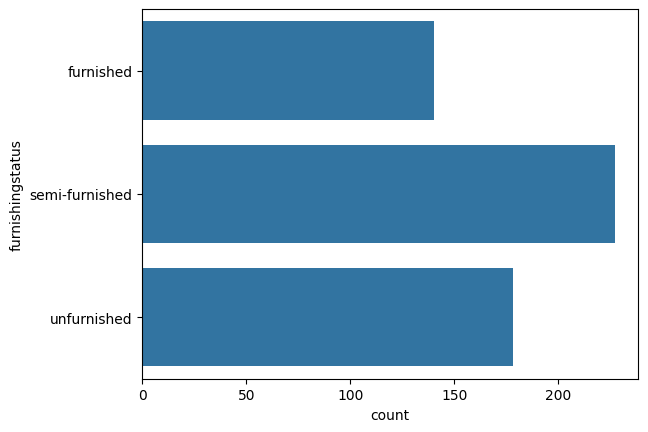

In [198]:
for i in data.select_dtypes(include='object').columns:
  sns.countplot(data[i])
  plt.show()

In [199]:
data.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [200]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [201]:
x=data.drop('price',axis=1)
y=data['price']

In [202]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [203]:
data.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [204]:
m={'yes':1,'no':0}

In [205]:
for i in data.select_dtypes(include='object').columns:
  if i!='furnishingstatus':
    x[i]=x[i].map(m)

In [206]:
f={'furnished':0, 'semi-furnished':1, 'unfurnished':2}

In [207]:
x['furnishingstatus']=x['furnishingstatus'].map(f)

In [208]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


In [209]:
y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


<Axes: >

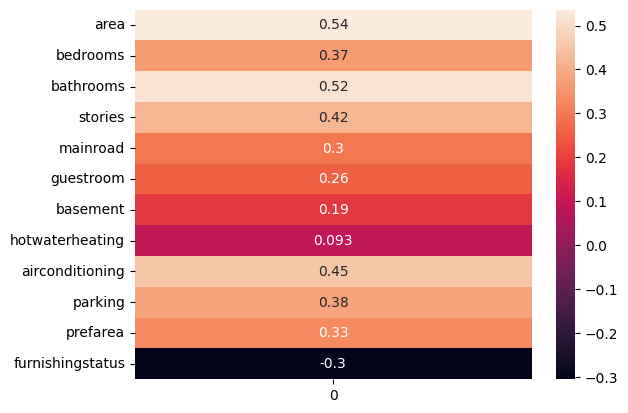

In [210]:
c=x.corrwith(y)
sns.heatmap(pd.DataFrame(c),annot=True)

In [211]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [212]:
x_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,6000,3,2,4,1,0,0,0,1,1,0,0
93,7200,3,2,1,1,0,1,0,1,3,0,1
335,3816,2,1,1,1,0,1,0,1,2,0,0
412,2610,3,1,2,1,0,1,0,0,0,1,2
471,3750,3,1,2,1,0,0,0,0,0,0,2


In [213]:
x_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,5900,4,2,2,0,0,1,0,0,1,0,2
77,6500,3,2,3,1,0,0,0,1,0,1,0
360,4040,2,1,1,1,0,0,0,0,0,0,1
90,5000,3,1,2,1,0,0,0,1,0,0,1
493,3960,3,1,1,1,0,0,0,0,0,0,0


In [215]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train[['area']]=sc.fit_transform(x_train[['area']])
x_test[['area']]=sc.fit_transform(x_test[['area']])

In [225]:
for i in x_train.columns:
  if i!='area':
    x_train[i]=x_train[i]/3
    x_test[i]=x_test[i]/3

In [226]:
x_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,0.298969,1.000000,0.666667,1.333333,0.333333,0.0,0.000000,0.0,0.333333,0.333333,0.000000,0.000000
93,0.381443,1.000000,0.666667,0.333333,0.333333,0.0,0.333333,0.0,0.333333,1.000000,0.000000,0.333333
335,0.148866,0.666667,0.333333,0.333333,0.333333,0.0,0.333333,0.0,0.333333,0.666667,0.000000,0.000000
412,0.065979,1.000000,0.333333,0.666667,0.333333,0.0,0.333333,0.0,0.000000,0.000000,0.333333,0.666667
471,0.144330,1.000000,0.333333,0.666667,0.333333,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.666667


In [227]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error

In [228]:
models=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor()]

In [229]:
for i in models:
  i.fit(x_train,y_train)
  preds=i.predict(x_test)
  mse=root_mean_squared_error(y_test,preds)
  print(mse)

1306254.465576087
1386499.8829787318
1603939.4006375151
2359644.912967783
1538024.73617323


In [230]:
model=LinearRegression()
model.fit(x_train,y_train)
preds=model.predict(x_test)

In [231]:
preds

array([5454614.2942255 , 7545457.32334606, 3197405.95672291,
       4754218.16194158, 3462505.56995934, 3865295.24450039,
       6060273.0303029 , 6607980.66497372, 2840367.95143442,
       2719697.41815887, 9989160.08901647, 2955378.44186624,
       3310247.23566339, 3428043.23018969, 3844078.27628279,
       5410019.61404034, 2994893.1869062 , 5067977.52543042,
       4630826.72969321, 3782269.89357978, 5992137.03279738,
       6148783.14388301, 2870334.45104777, 4882155.22220824,
       5602673.63413633, 8020423.15652763, 3329835.41340884,
       5305688.57584982, 8886069.4835672 , 3503690.27296187,
       6575996.89987717, 3423035.03891674, 6999502.44423464,
       4450583.53061749, 3769704.96401077, 5957731.95495217,
       4940853.56635553, 4472467.37341637, 3317205.7357828 ,
       4694397.33074702, 4903189.35013249, 3650215.4309553 ,
       7521585.32592333, 4166101.2406667 , 4006069.86941787,
       4548863.87228476, 6962181.72479942, 4165574.60060775,
       4183592.70926566,

In [232]:
y_test

,price
316,4060000
77,6650000
360,3710000
90,6440000
493,2800000
...,...
15,9100000
357,3773000
39,7910000
54,7350000


<Axes: xlabel='price', ylabel='Density'>

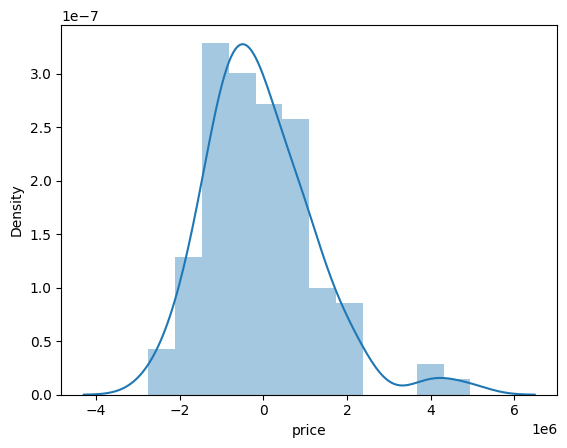

In [233]:
sns.distplot(y_test-preds)

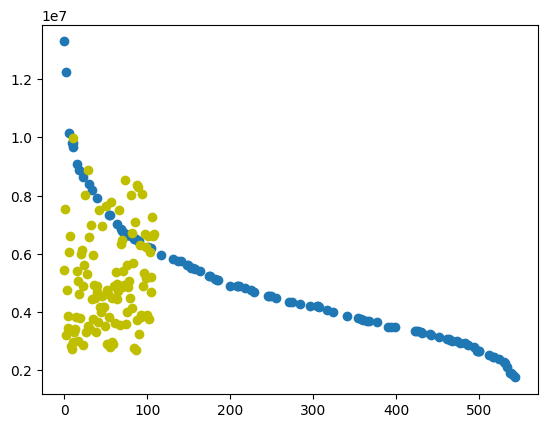

In [234]:
plt.plot(y_test,'o',label='y_test')
plt.plot(preds,'yo',label='preds')